 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [4]:
whale_returns = Path("Resources/whale_returns.csv")

In [5]:
# Reading whale returns
whale_returns = pd.read_csv(whale_returns, parse_dates = True, index_col = "Date", infer_datetime_format = True)
whale_returns=whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns, parse_dates = True, index_col = "Date", infer_datetime_format = True)
algo_returns = algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls
algo_returns.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_data = Path("Resources/sp_tsx_history.csv")
sp_tsx_data = pd.read_csv(sp_tsx_data, parse_dates = True, index_col = "Date", infer_datetime_format = True)
sp_tsx_data = sp_tsx_data.sort_index()
sp_tsx_data.head()


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [12]:
# Check Data Types
sp_tsx_data.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp_tsx_data["Close"] = sp_tsx_data["Close"].str.replace("$","").str.replace(",","").astype("float");sp_tsx_data.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [14]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_data.pct_change();sp_tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [15]:
# Drop nulls
sp_tsx_returns = sp_tsx_returns.dropna().copy();sp_tsx_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns.columns = ["S&P TSX"]; sp_tsx_returns.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_returns_all_portfolio = pd.concat(
    [whale_returns, algo_returns, sp_tsx_returns], axis = "columns", join = "inner");joined_returns_all_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

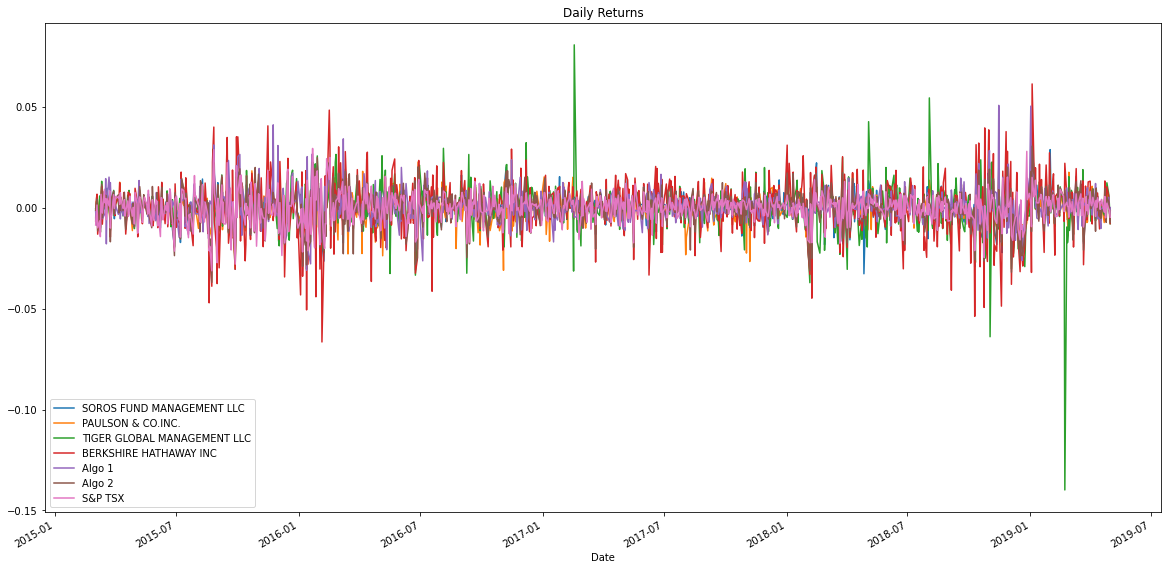

In [20]:
# Plot daily returns of all portfolios
joined_returns_all_portfolio.plot(figsize = (20,10), title = "Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

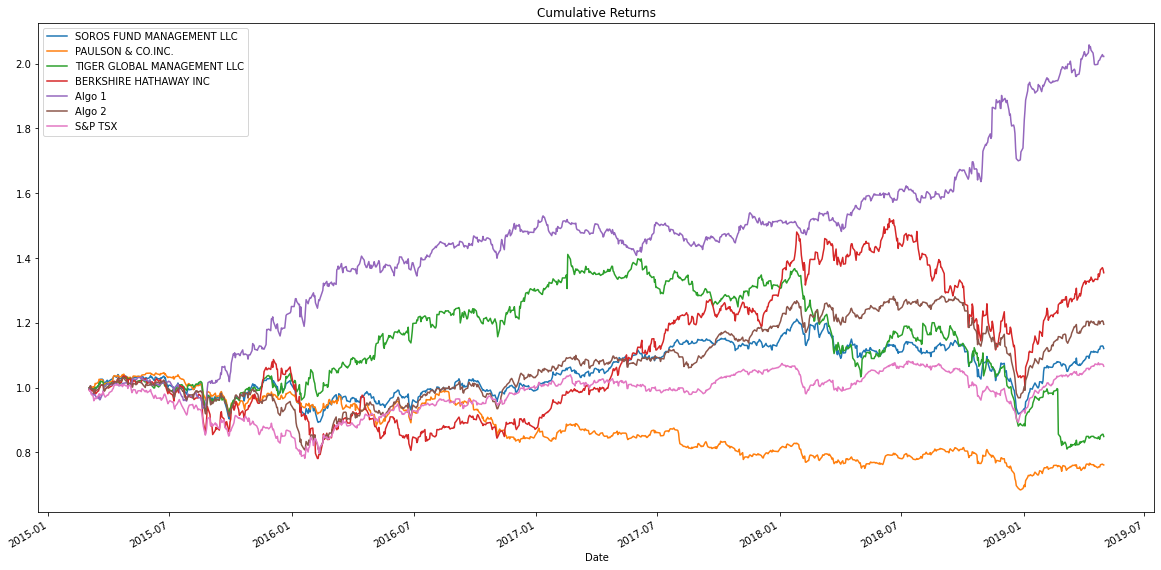

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_returns_all_portfolio = (1 + joined_returns_all_portfolio).cumprod()
# Plot cumulative returns
cumulative_returns_all_portfolio.plot(figsize = (20,10), title = "Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

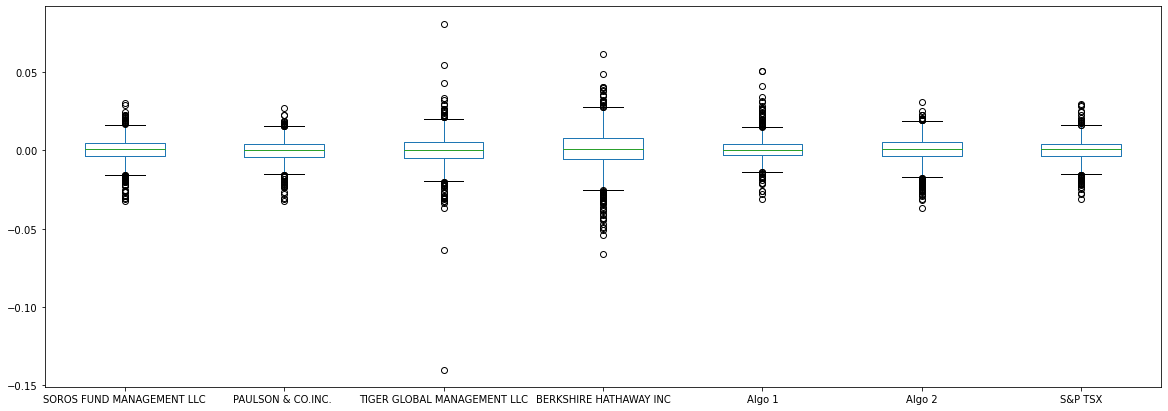

In [22]:
# Box plot to visually show risk
joined_returns_all_portfolio.plot.box(figsize = (20,7))

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
daily_std_all_portfolio = pd.DataFrame(joined_returns_all_portfolio.std()).rename(columns = {0:"Daily Std"});daily_std_all_portfolio

,Daily Std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
S&P TSX,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

<AxesSubplot:title={'center':'Rolling Std 21-Day Window for all Portfolios '}, xlabel='Date'>

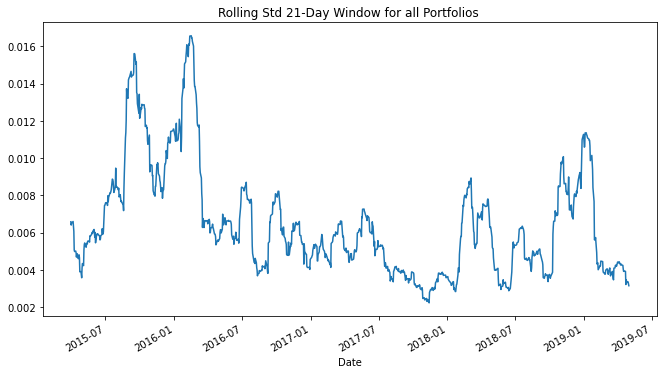

In [24]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_rolling_std = joined_returns_all_portfolio["S&P TSX"].rolling(window = 21).std()
# Determine which portfolios are riskier than the S&P TSX 60
sp_tsx_rolling_std.plot(figsize = (11,6), title = "Rolling Std 21-Day Window for all Portfolios ")

### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
daily_std_all_portfolio = pd.DataFrame(joined_returns_all_portfolio.std()).rename(columns = {0:"Daily Std"});daily_std_all_portfolio

,Daily Std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
S&P TSX,0.007034


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Std 21-Day Window for all Portfolios '}, xlabel='Date'>

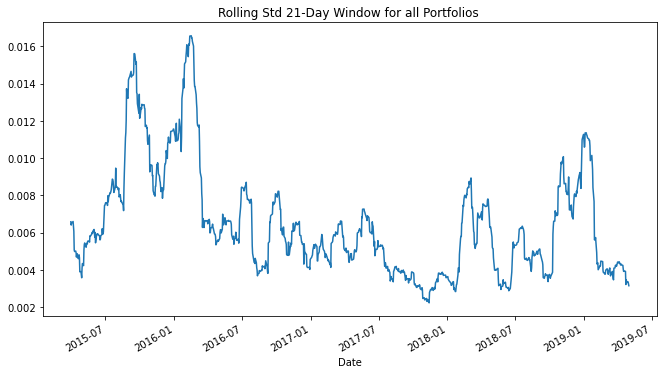

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp_tsx_rolling_std = joined_returns_all_portfolio["S&P TSX"].rolling(window = 21).std()
# Plot the rolling standard deviation
sp_tsx_rolling_std.plot(figsize = (11,6), title = "Rolling Std 21-Day Window for all Portfolios ")

### Calculate and plot the correlation

In [27]:
# Calculate the correlation
correlation = joined_returns_all_portfolio.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling Beta 60-Day Window for Algo 2 and S&P TSX'}, xlabel='Date'>

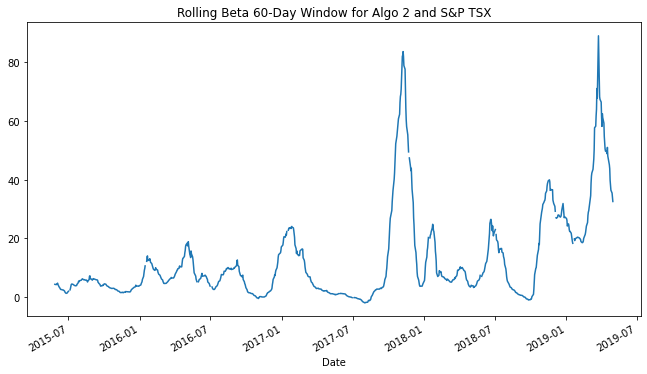

In [28]:
# Calculate covariance of a single portfolio
rolling_covariance = cumulative_returns_all_portfolio["Algo 2"].rolling(window = 60).cov(cumulative_returns_all_portfolio["S&P TSX"])
# Calculate variance of S&P TSX
rolling_variance = sp_tsx_returns["S&P TSX"].rolling(window = 60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize = (11,6), title = "Rolling Beta 60-Day Window for Algo 2 and S&P TSX")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average of all Portfolio'}, xlabel='Date'>

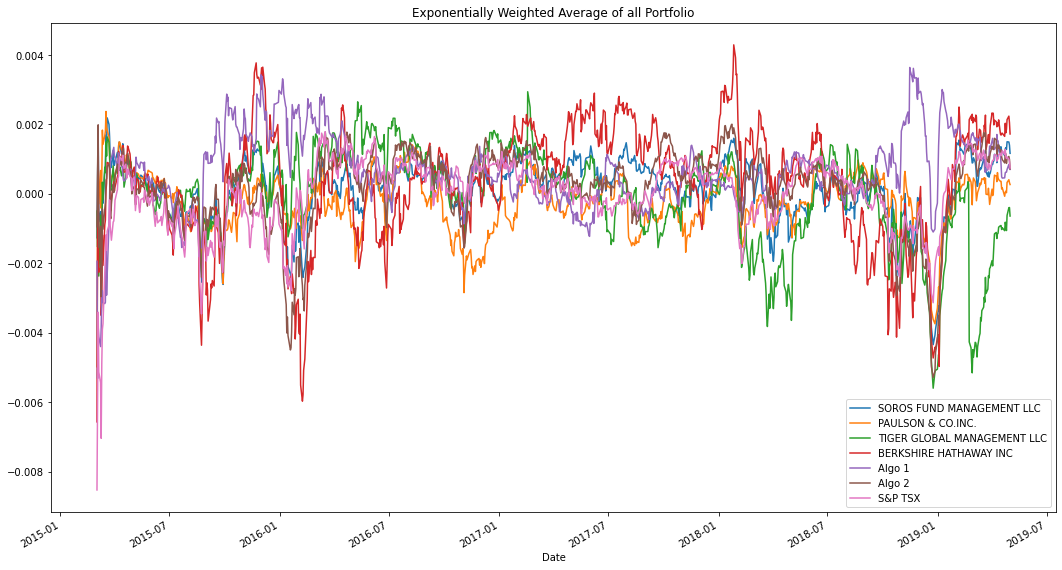

In [29]:
# Use `ewm` to calculate the rolling window
rolling_ewm = joined_returns_all_portfolio.ewm(halflife=21, adjust = True).mean()
rolling_ewm.plot(figsize = (18,10), title = "Exponentially Weighted Average of all Portfolio")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
sharpe_ratios = joined_returns_all_portfolio.mean() * 252 / (joined_returns_all_portfolio.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

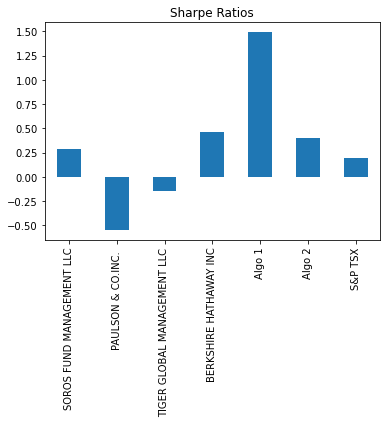

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [33]:
# Reading data from 1st stock
shop_data = Path("Resources/shop_historical.csv")
shop_data = pd.read_csv(shop_data, parse_dates=True, index_col="Date", infer_datetime_format=True).sort_index().drop(columns ="Symbol").copy()

shop_data.columns = ["Shop"]; shop_data.head()

,Shop
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [34]:
# Reading data from 2nd stock
otex_data = Path("Resources/otex_historical.csv")
otex_data = pd.read_csv(otex_data, parse_dates=True, index_col="Date", infer_datetime_format=True).sort_index().drop(columns= "Symbol").copy()

otex_data.columns = ["Otex"]; otex_data.head()

,Otex
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [35]:
# Reading data from 3rd stock
loblaw_data = Path("Resources/l_historical.csv")
loblaw_data = pd.read_csv(loblaw_data, parse_dates = True, index_col = "Date", infer_datetime_format= True).sort_index().drop(columns = "Symbol").copy()

loblaw_data.columns = ["L"]; loblaw_data.head()

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [36]:
# Combine all stocks in a single DataFrame
combined_data = pd.concat(
    [shop_data, otex_data, loblaw_data], axis = "columns", join = "inner"); combined_data.head()

,Shop,Otex,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [37]:
# Reset Date index
combined_data.reset_index()

,Date,Shop,Otex,L
0,2018-01-02,132.06,43.58,57.99
1,2018-01-03,135.15,43.07,57.41
2,2018-01-04,137.46,42.91,57.42
3,2018-01-05,137.26,42.57,57.42
4,2018-01-08,139.51,42.16,56.86
...,...,...,...,...
496,2019-12-20,513.22,58.68,67.90
497,2019-12-23,511.62,57.89,67.68
498,2019-12-24,525.39,57.44,67.67
499,2019-12-27,534.76,57.70,67.78


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [38]:
# Calculate daily returns
daily_returns = combined_data.pct_change()
# Drop NAs
daily_returns = daily_returns.dropna().copy()
# Display sample data
daily_returns.head()

,Shop,Otex,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = pd.DataFrame(daily_returns.dot(weights)).rename(columns = {0: "Weighted Returns"})

# Display sample data
weighted_returns.head()

,Weighted Returns
Date,
2018-01-03,0.000565
2018-01-04,0.004517
2018-01-05,-0.003126
2018-01-08,-0.000997
2018-01-09,-0.000999


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame
joined_returns_df = pd.concat(
    [joined_returns_all_portfolio, daily_returns], axis = "columns", join="inner")
  
joined_returns_df.head()

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [54]:
# Calculate the annualized `std`

annualized_std_df = joined_returns_df * np.sqrt(252); annualized_std_df.head(7)

NameError: name 'joined_returns_df' is not defined

### Calculate and plot rolling `std` with 21-day window

In [56]:
# Calculate rolling standard deviation
rolling_std_21d = joined_returns_df.rolling(window = 21).std()

# Plot rolling standard deviation

rolling_std_21d.plot(figsize = (35,15), title = " Rolling Std 21-Day")


NameError: name 'joined_returns_df' is not defined

### Calculate and plot the correlation

In [57]:
# Calculate and plot the correlation
correlations = joined_returns_df.corr()
correlations.plot(figsize = (20,10))

NameError: name 'joined_returns_df' is not defined

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [58]:
# Calculate and plot Beta
rolling_covariance_60d = joined_returns_df["Shop"].rolling(window = 60).cov(joined_returns_df["S&P TSX"])

rolling_variance_60d = joined_returns_df["S&P TSX"].rolling(window = 60).var()

rolling_beta_60d = rolling_covariance_60d / rolling_variance_60d

rolling_beta_60d.plot(figsize = (10,5), title = "Rolling Beta 60-Day")

NameError: name 'joined_returns_df' is not defined

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [59]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = joined_returns_df.mean() * 252 / (joined_returns_df.std() * np.sqrt(252))

NameError: name 'joined_returns_df' is not defined

<AxesSubplot:title={'center':'Sharpe Ratios'}>

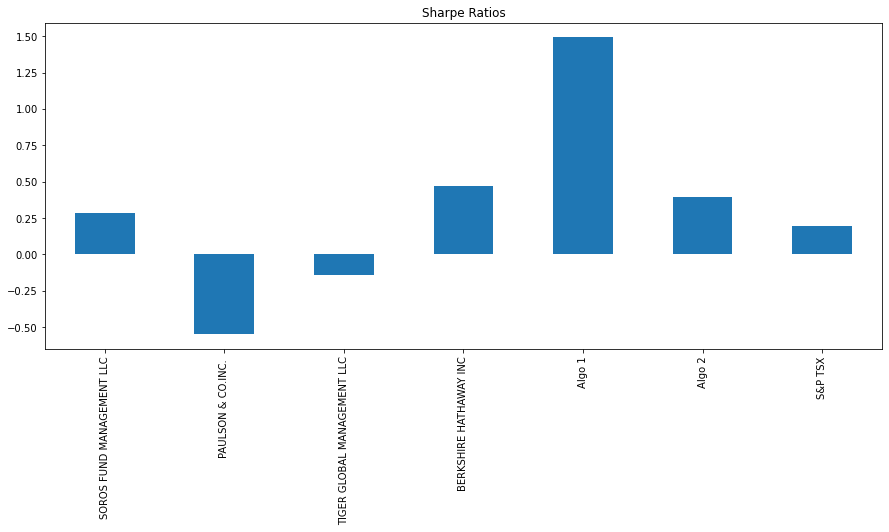

In [46]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize = (15,6), title = "Sharpe Ratios")

### How does your portfolio do?

Write your answer here!